## Modelo 3

Se cargan las librerías.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle
import yaml

Se cargan los datos procesados.

In [3]:
segmentos = []

# Leer los archivos CSV segmentados y almacenarlos en la lista
for i in range(0,3):
    segmento = pd.read_csv(f'../data/processed/segmento_{i+1}.csv')
    segmentos.append(segmento)
# Concatenar los DataFrames de los segmentos en uno solo
df1 = pd.concat(segmentos, ignore_index=True)

Se separa el test del Dataframe original no balanceado para asegurar que los datos nuevos serán similares a los reales a predecir, manteniendo proporción en los datos

In [4]:
# Crear las variables para features y target
X = df1[['amt', 'city_pop', 'distancia', 'fraudes_por_Categoria',
       'fraudes_por_estado', 'fraudes_por_edad', 'fraudes_por_hora',
       'fraudes_por_día']]
y = df1['is_fraud']

# Separamos una muestra del DataFrame para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.1,
                                                   random_state=0, stratify=y)


Una vez obtenido el test, se pasa a balancear los datos, tanto para aligerar la carga del entrenamiento, como para intentar que el modelo prediga mejor la clase minoritaría.

In [57]:
# Aplicamos undersampling a los datos
rus = RandomUnderSampler()

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Separamos el nuevo conjunto en X e y
X_under = X_resampled
y_under = y_resampled

Se separa en train y test.

Con un GridSearch, se hiperparametriza un KNeighborsClassifier.

In [59]:
# Definir el pipeline
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", KNeighborsClassifier())
])

knn_params = {
    'selectkbest__k': np.arange(2, 9),
    'classifier__n_neighbors': np.arange(3, 10),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__p': [1, 2],
}
# Crear el GridSearchCV
clf = GridSearchCV(estimator=pipe, param_grid=knn_params, cv=3, scoring="roc_auc")

# Ajustar el GridSearchCV
clf.fit(X_resampled, y_resampled)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__algorithm': ['auto', 'ball_tree',
                                                   'kd_tree', 'brute'],
                         'classifier__n_neighbors': array([3, 4, 5, 6, 7, 8, 9]),
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance'],
                         'selectkbest__k': array([2, 3, 4, 5, 6, 7, 8])},
             scoring='roc_auc')

In [60]:
clf.best_params_

{'classifier__algorithm': 'brute',
 'classifier__n_neighbors': 9,
 'classifier__p': 2,
 'classifier__weights': 'distance',
 'selectkbest__k': 3}

In [61]:
predictions = clf.predict(X_test)

[[123949   4968]
 [    29    722]]


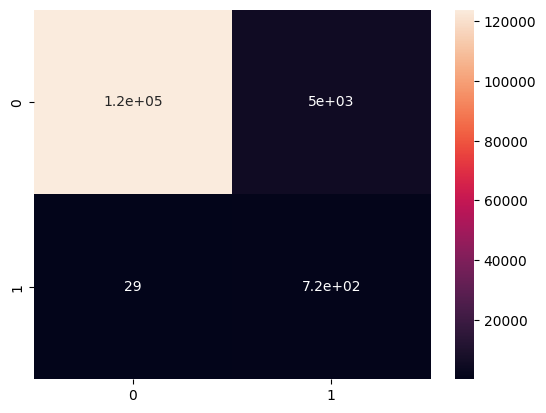

In [62]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)
sns.heatmap(c_matrix, annot=True);

In [10]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [64]:
precision_score(y_test, predictions)

0.12688927943760983

In [65]:
recall_score(y_test, predictions)

0.9613848202396804

In [66]:
roc_auc_score(y_test, predictions)

0.96142419879007

In [68]:
# Definir el pipeline
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", KNeighborsClassifier())
])

knn_params = {
    'selectkbest__k': np.arange(2, 8),
    'classifier__n_neighbors': np.arange(15, 20),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto',  'brute'],
    'classifier__p': [1, 2],
}
# Crear el GridSearchCV
clf = GridSearchCV(estimator=pipe, param_grid=knn_params, cv=3, scoring="roc_auc")

# Ajustar el GridSearchCV
clf.fit(X_resampled, y_resampled)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__algorithm': ['auto', 'brute'],
                         'classifier__n_neighbors': array([15, 16, 17, 18, 19]),
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance'],
                         'selectkbest__k': array([2, 3, 4, 5, 6, 7])},
             scoring='roc_auc')

In [69]:
clf.best_params_

{'classifier__algorithm': 'brute',
 'classifier__n_neighbors': 19,
 'classifier__p': 1,
 'classifier__weights': 'distance',
 'selectkbest__k': 3}

In [70]:
predictions = clf.predict(X_test)

[[123617   5300]
 [    25    726]]


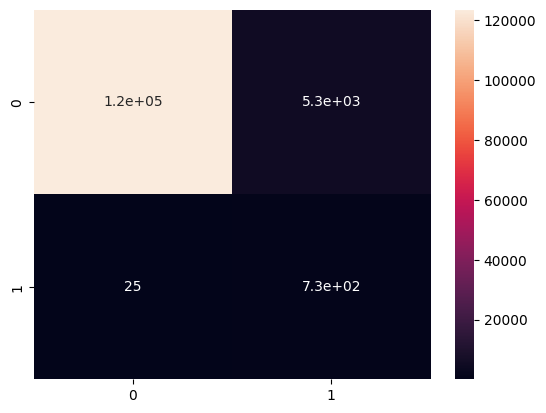

In [71]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)
sns.heatmap(c_matrix, annot=True);

In [72]:
print("Precision score:", precision_score(y_test, predictions))
print("Recall score:", recall_score(y_test, predictions))
print("ROC AUC score:", roc_auc_score(y_test, predictions))

Precision score: 0.12047792897444408
Recall score: 0.966711051930759
ROC AUC score: 0.9627996644420738


In [87]:
# Definir el pipeline
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", KNeighborsClassifier())
])

knn_params = {
    'selectkbest__k': np.arange(2, 8),
    'classifier__n_neighbors': np.arange(15, 20),
    'classifier__algorithm': ['auto', 'brute'],
    'classifier__p': [1, 100],
}
# Crear el GridSearchCV
clf = GridSearchCV(estimator=pipe, param_grid=knn_params, cv=3, scoring="roc_auc")

# Ajustar el GridSearchCV
clf.fit(X_resampled, y_resampled)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__algorithm': ['auto', 'brute'],
                         'classifier__n_neighbors': array([15, 16, 17, 18, 19]),
                         'classifier__p': [1, 100],
                         'selectkbest__k': array([2, 3, 4, 5, 6, 7])},
             scoring='roc_auc')

In [88]:
predictions = clf.predict(X_test)

In [89]:
clf.best_params_

{'classifier__algorithm': 'auto',
 'classifier__n_neighbors': 15,
 'classifier__p': 1,
 'selectkbest__k': 3}

[[124978   3939]
 [    29    722]]


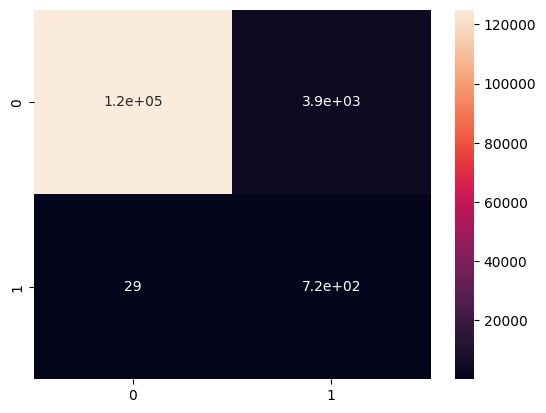

In [90]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)
sns.heatmap(c_matrix, annot=True);

In [91]:
print("Precision score:", precision_score(y_test, predictions))
print("Recall score:", recall_score(y_test, predictions))
print("ROC AUC score:", roc_auc_score(y_test, predictions))

Precision score: 0.1549023814632053
Recall score: 0.9613848202396804
ROC AUC score: 0.9654151386971419


Probamos a entrenar el modelo con otro tipo de balanceo, menos agresivo.

In [92]:
# Define las proporciones deseadas para cada clase
sampling_strategy = {
    0: int(0.01 * len(y_train)),
    1: int(0.3 * len(y_train)) if int(0.3 * len(y_train)) <= sum(y_train == 1) else sum(y_train == 1)
}

rus = RandomUnderSampler(random_state=0, sampling_strategy=sampling_strategy)

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [93]:
y_resampled.value_counts(normalize=True)

is_fraud
0    0.633379
1    0.366621
Name: proportion, dtype: float64

In [94]:
# Definir el pipeline
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", KNeighborsClassifier())
])

knn_params = {
    'selectkbest__k': np.arange(2, 9),
    'classifier__n_neighbors': np.arange(3, 10),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__p': [1, 2],
}
# Crear el GridSearchCV
clf = GridSearchCV(estimator=pipe, param_grid=knn_params, cv=3, scoring="roc_auc")

# Ajustar el GridSearchCV
clf.fit(X_resampled, y_resampled)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__algorithm': ['auto', 'ball_tree',
                                                   'kd_tree', 'brute'],
                         'classifier__n_neighbors': array([3, 4, 5, 6, 7, 8, 9]),
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance'],
                         'selectkbest__k': array([2, 3, 4, 5, 6, 7, 8])},
             scoring='roc_auc')

In [95]:
predictions = clf.predict(X_test)

In [97]:
clf.best_params_

{'classifier__algorithm': 'ball_tree',
 'classifier__n_neighbors': 9,
 'classifier__p': 1,
 'classifier__weights': 'uniform',
 'selectkbest__k': 3}

[[125195   3722]
 [    30    721]]


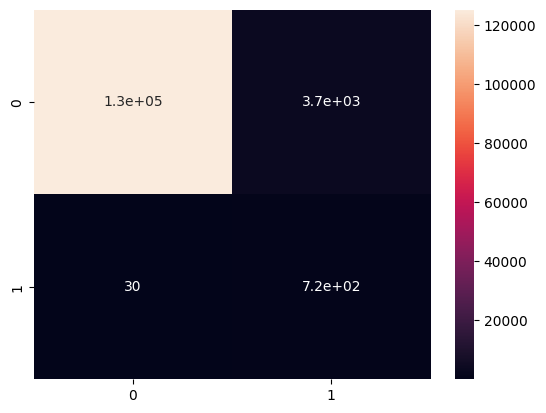

In [96]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)
sns.heatmap(c_matrix, annot=True);

In [98]:
print("Precision score:", precision_score(y_test, predictions))
print("Recall score:", recall_score(y_test, predictions))
print("ROC AUC score:", roc_auc_score(y_test, predictions))

Precision score: 0.1622777402655863
Recall score: 0.9600532623169108
ROC AUC score: 0.965590986518881


In [5]:
# Definir el pipeline
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", KNeighborsClassifier())
])

knn_params = {
    'selectkbest__k': [3],
    'classifier__n_neighbors': [9],
    'classifier__weights': ['uniform'],
    'classifier__p': [1],
}
# Crear el GridSearchCV
clf = GridSearchCV(estimator=pipe, param_grid=knn_params, cv=3, scoring="roc_auc", verbose=10)

# Ajustar el GridSearchCV
clf.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START classifier__n_neighbors=9, classifier__p=1, classifier__weights=uniform, selectkbest__k=3
[CV 1/3; 1/1] END classifier__n_neighbors=9, classifier__p=1, classifier__weights=uniform, selectkbest__k=3;, score=0.950 total time=  10.3s
[CV 2/3; 1/1] START classifier__n_neighbors=9, classifier__p=1, classifier__weights=uniform, selectkbest__k=3
[CV 2/3; 1/1] END classifier__n_neighbors=9, classifier__p=1, classifier__weights=uniform, selectkbest__k=3;, score=0.949 total time=  10.1s
[CV 3/3; 1/1] START classifier__n_neighbors=9, classifier__p=1, classifier__weights=uniform, selectkbest__k=3
[CV 3/3; 1/1] END classifier__n_neighbors=9, classifier__p=1, classifier__weights=uniform, selectkbest__k=3;, score=0.944 total time=  10.4s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [9], 'classifier__p': [1],
                         'classifier__weights': ['uniform'],
                         'selectkbest__k': [3]},
             scoring='roc_auc', verbose=10)

In [6]:
predictions = clf.predict(X_test)

In [7]:
clf.best_params_

{'classifier__n_neighbors': 9,
 'classifier__p': 1,
 'classifier__weights': 'uniform',
 'selectkbest__k': 3}

[[128842     75]
 [   221    530]]


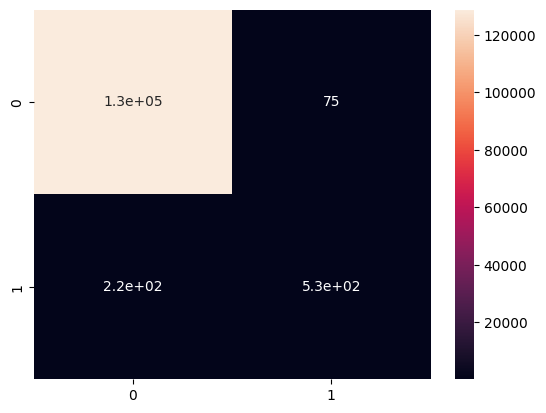

In [8]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)
sns.heatmap(c_matrix, annot=True);

In [11]:
print("Precision score:", precision_score(y_test, predictions))
print("Recall score:", recall_score(y_test, predictions))
print("ROC AUC score:", roc_auc_score(y_test, predictions))

Precision score: 0.8760330578512396
Recall score: 0.7057256990679095
ROC AUC score: 0.8525719647010778


In [6]:
# Para escribir el archivo pickle
with open('../models/Model3/trained_model.pkl', 'wb') as archivo_salida:
    pickle.dump(clf.best_estimator_, archivo_salida)

# Para escribir el archivo YAML
with open("../models/Model3/model_config.yaml", "w") as f:
    yaml.dump(clf.best_params_, f)

De los modelos hiperparametrizados, este es el mejor, por tanto, se ha guardado en formato pickle.